## Trabajando con RNNS
### Comenzamos con una red neuronal recurrente simple

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

2025-08-26 19:41:57.151548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 19:41:57.164231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756248117.180402   92481 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756248117.184913   92481 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756248117.196650   92481 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [5]:
# con esto le ensenho al modelo
x = np.array([[[0], [1], [2]], [[1], [2], [3]]]) # secuencia

# esto es lo que quiero que mi modelo trate de predecir
y = np.array([3, 4])

# defino mi modelo de rnn simple
model = Sequential([
  SimpleRNN(10, activation="tanh", input_shape=(3, 1)),
  Dense(1)
])

model.compile(optimizer="adam", loss="MSE")
model.fit(x, y, epochs=200, verbose=0)

print("Prediccion del modelo para [2, 3, 4]: ", model.predict(np.array([[[2], [3], [4]]])))

2025-08-26 19:42:40.250457: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/frejala/Code/cit-courses/deep-learning-course/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediccion del modelo para [2, 3, 4]:  [[3.2583735]]


Caso de uso para prediccion de temperaturas

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [7]:
# traemos el dataset
df = pd.read_csv(r"temperature.csv")

temps = df["San Francisco"].dropna().values.reshape(-1, 1)

# Normalizacion
scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps)

x, y = [], []

for i in range(len(temps_scaled) - 25):
	x.append(temps_scaled[i:i+24])
	y.append(temps_scaled[i+24])

x, y = np.array(x), np.array(y)

model = Sequential([
	SimpleRNN(50, activation="tanh", input_shape=(24, 1)),
	Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(x, y, epochs=10, batch_size=64)

pred = model.predict(x[:1])
print("Prediccion para la proxima hora: ", scaler.inverse_transform(pred))

Epoch 1/10


/home/frejala/Code/cit-courses/deep-learning-course/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0013
Epoch 2/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.3344e-04
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.5452e-04
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.2942e-04
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.2729e-04
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.2594e-04
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.2674e-04
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2819e-04
Epoch 9/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.1675e-04
Epoch 10/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.1843e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Prediccion para la proxima hora:  [[288.92557]]


In [8]:
pred = model(x[:1])
pred_kelvin = scaler.inverse_transform(pred)[0][0]
pred_celsius = pred_kelvin - 273.15
print(f"Prediccion de la siguiente hora: {pred_kelvin:.2f} K / {pred_celsius:.2f}ºC")

Prediccion de la siguiente hora: 288.93 K / 15.78ºC


RNN Bidireccional

In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


# cargamos nuestra base de datos
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Padding de secuencias
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

model = Sequential([
	Embedding(10000, 128, input_length=maxlen),
	Bidirectional(LSTM(64)),
	Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# evaluamos nuestro modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


/home/frejala/Code/cit-courses/deep-learning-course/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 201ms/step - accuracy: 0.7868 - loss: 0.4480 - val_accuracy: 0.8647 - val_loss: 0.3236
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 202ms/step - accuracy: 0.8966 - loss: 0.2590 - val_accuracy: 0.8750 - val_loss: 0.2995
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 211ms/step - accuracy: 0.9291 - loss: 0.1857 - val_accuracy: 0.8750 - val_loss: 0.3188
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 188ms/step - accuracy: 0.9504 - loss: 0.1359 - val_accuracy: 0.8712 - val_loss: 0.3552
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.9627 - loss: 0.1025 - val_accuracy: 0.8551 - val_loss: 0.3976
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.8551 - loss: 0.3976
Loss: 0.3976, Accuracy: 0.8551


Evaluar el modelo y ver las predicciones

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step


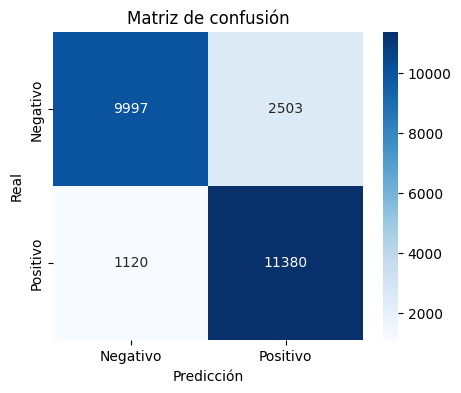

              precision    recall  f1-score   support

    Negativo       0.90      0.80      0.85     12500
    Positivo       0.82      0.91      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.85     25000
weighted avg       0.86      0.86      0.85     25000



In [10]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negativo", "Positivo"],
    yticklabels=["Negativo", "Positivo"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Negativo", "Positivo"]))

In [11]:
# diccionario de palabras
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# decodificando una reseña
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Ejemplo: mostramos 5 reviews
for i in range(5):
    print("\nReseña original: ", decode_review(X_test[i]))
    print("Etiqueta real: ", "Positivo" if y_test[i] == 1 else "Negativo")
    print("Predicción modelo: ", "Positivo" if y_pred[i] == 1 else "Negativo")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Reseña original:  ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Etiqueta real:  Negativo
Predicción modelo:  Negativo

Reseña original:  psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by 

Creamos un modelo sec2sec para traducciones de frases

In [12]:
import zipfile
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import requests
import random
import string
import re
import numpy as np
import tensorflow.data as tf_data
import tensorflow.strings as tf_strings
import keras
from keras import layers
from keras import ops
from keras.layers import TextVectorization

In [16]:
# vamos a descargar nuestro dataset
url = 'https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip'
zip_path = "/home/frejala/Code/cit-courses/deep-learning-course/clase-1908/spa-eng.zip"
print("Descargando dataset")

try:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Linux; Android 7.0; WAS-L03T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.101 Mobile Safari/537.36'
    }
    response = requests.get(url, headers=headers, stream=None)
    response.raise_for_status()

    # guardar archivo
    with open(zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print("Descarga completa")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo {e}")
    print("Intenta de nuevo")
    !wget -O spa-eng.zip https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

extract_path = "/home/frejala/Code/cit-courses/deep-learning-course/clase-1908/spa-eng"
os.makedirs(extract_path, exist_ok=True)
print("Extrayendo el archivo")

try:
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
except zipfile.BadZipFile:
    print("Error al extraer el archivo zip")

actual_data_path = os.path.join(extract_path, "spa-eng")
print(f"Buscando datos en {actual_data_path}")

text_file = os.path.join(actual_data_path, "spa.txt")
print(f"Buscando datos en {text_file}")

if os.path.exists(text_file):
    with open(text_file, encoding="utf-8") as f:
        lines = f.read().split("\n")[:-1]
    text_pairs = []
    for line in lines:
        if "\t" in line:
            parts = line.split("\t")
            if len(parts) >= 2:
                eng, spa = parts[0], parts[1]
                spa = "[start]" + spa + "[end]"
                text_pairs.append((eng, spa))

    print(f"Correctamente cargados {len(text_pairs)} pares traducidos")

    print("Ejemplos")
    for i in range(min(5, len(text_pairs))):
        print(f"English {text_pairs[i][0]}")
        print(f"Spanish {text_pairs[i][1]}\n")

Descargando dataset
Descarga completa
Extrayendo el archivo
Buscando datos en /home/frejala/Code/cit-courses/deep-learning-course/clase-1908/spa-eng/spa-eng
Buscando datos en /home/frejala/Code/cit-courses/deep-learning-course/clase-1908/spa-eng/spa-eng/spa.txt
Correctamente cargados 118964 pares traducidos
Ejemplos
English Go.
Spanish [start]Ve.[end]

English Go.
Spanish [start]Vete.[end]

English Go.
Spanish [start]Vaya.[end]

English Go.
Spanish [start]Váyase.[end]

English Hi.
Spanish [start]Hola.[end]

